##### Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
### Libraries for webscrapping 
import requests 
from bs4 import BeautifulSoup 
import re 
import csv

In [61]:
URL = "https://www.makaan.com/listings?beds=1,2,3,3plus&propertyType=apartment,villa,independent-house,studio-apartment&listingType=buy&pageType=LISTINGS_PROPERTY_URLS&cityName=Bangalore&cityId=2&templateId=MAKAAN_CITY_LISTING_BUY"

In [62]:
page = requests.get(URL)

In [63]:
page.status_code

200

In [64]:
pagecontent = page.text
pagecontent

'<!doctype html> <html lang="en"><head><meta http-equiv="Content-type" content="text/html; charset=utf-8"><title>properties in Bangalore :Makaan.com</title><meta name="theme-color" content="#fff" id="themeColor"><meta content="origin" name="referrer"><meta name="p:domain_verify" content="55ce01b3ca93c05fd5a41439a23dd0d9"><meta name="fb:pages" content="155462194517712"><meta name="viewport" content="minimum-scale=1.0, width=device-width, initial-scale=1.0, maximum-scale=5.0, user-scalable=no"><link rel="preload" href="//static.makaan.com/scripts/vendor/require.min.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/main.0548c838.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/infra.a7ac1784.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/dependency/commonBundle.dab78bf4.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/app.7d0dcfaa.js" as="script"><meta name="twitter:card" content="summary"><meta name="twi

In [65]:
soup = BeautifulSoup(pagecontent)
type(soup)

bs4.BeautifulSoup

In [66]:
soup.find_all('a',attrs={'class':'projName'})

[<a class="projName" data-link-name="Siddartha Solitaire Phase 2" data-link-type="project overview" data-track-label="17766618_1_3128971_select" data-type="projName" href="https://www.makaan.com/bangalore/siddartha-builders-solitaire-phase-2-in-hosa-road-3128971" target="_blank" title="Go to Siddartha Solitaire Phase 2"><span>Siddartha Solitaire Phase 2</span></a>,
 <a class="projName" data-link-name="Sri Murari Grand" data-link-type="project overview" data-track-label="17755981_2_3081312_select" data-type="projName" href="https://www.makaan.com/bangalore/sri-murari-builders-grand-in-begur-3081312" target="_blank" title="Go to Sri Murari Grand"><span>Sri Murari Grand</span></a>,
 <a class="projName" data-link-name="Sri Nandana Neo" data-link-type="project overview" data-track-label="17764721_3_3155040_select" data-type="projName" href="https://www.makaan.com/bangalore/sri-nandana-builders-neo-in-electronic-city-phase-1-3155040" target="_blank" title="Go to Sri Nandana Neo"><span>Sri Na

In [67]:
list_1 = soup.find_all('table',attrs={'class':'listing-highlights'})
list_1

[<table class="listing-highlights"><thead><tr><td colspan="2">Specifications</td></tr></thead><tbody><tr class="chevron-wrap" title="see this property details"><td colspan="2"><i class="icon-link"></i></td></tr><tr class="hcol"><td class="price"><div data-type="price-link"><sup class="rupee currency"> </sup><span class="val" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer"><meta content="https://www.makaan.com/bangalore/siddartha-builders-solitaire-phase-2-in-hosa-road-17766618/3bhk-1371-sqft-apartment" itemprop="url"/><meta content="7338963 " itemprop="price"/><meta content="INR" itemprop="priceCurrency"/>73.38</span><span class="unit"> L</span></div></td><td class="lbl rate">5,353 / sq ft</td></tr><tr class="hcol"><td class="size"><span class="val">1371 </span></td><td class="lbl">Area in sq ft</td></tr><tr class="hcol w44"><td class="val">Under Construction</td><td class="lbl">Construction Status</td></tr></tbody></table>,
 <table class="listing-highlights"><thead><

In [68]:
rates=[]
statu=[]
Area=[]
Ratepersqft=[]
localities=[]
possession=[]
new_resale=[]
propert=[]
buildername=[]
RERA=[]

for i in range(1,50):
    URL='https://www.makaan.com/listings?beds=1rk,1,2,3,3plus&listingType=buy&pageType=LISTINGS_PROPERTY_URLS&cityName=Bangalore&cityId=2&templateId=MAKAAN_CITY_LISTING_BUY&page={}'.format(i)
    page = requests.get(URL)
    content=page.content
    soup = BeautifulSoup(content,'html.parser')
    
    PRICE=soup.find_all('td',class_='price')
    for i in range(len(PRICE)):
        rates.append(PRICE[i].text)
        
    
    status=soup.find_all('td',class_="val")
    for i in range(len(status)):
        statu.append(status[i].text)   
    
    
    area=soup.find_all('td',class_="size")
    for i in range(len(area)):
        Area.append(area[i].text)
    
    
    ratepersqft=soup.find_all('td',class_="lbl rate")
    for i in range(len(ratepersqft)):
        Ratepersqft.append(ratepersqft[i].text)

    
   
    
    property_type = soup.find_all('div',class_='title-line')
    for i in range(len(property_type)):
        propert.append(property_type[i].text)
   

    locality = soup.find_all('span',itemprop='addressLocality')
    for i in range(len(locality)):
        localities.append(locality[i].text)
        
    


    BULIDER=soup.find_all('span',itemprop="name")
    for i in range(len(BULIDER)):
        buildername.append(BULIDER[i].text)
    
    for i in soup.find_all('div',class_='title-line'):
        info=i.find('div',class_='rera-tag-new')
        if info is None:
            RERA.append('not approval by RERA')
        else:
            RERA.append('approval by RERA')
    

In [11]:
print(len(rates))
print(len(statu))
print(len(Area))
print(len(Ratepersqft))
print(len(localities))

print(len(propert))
print(len(buildername))
print(len(RERA))

980
980
980
980
980
980
980
980


##### DATAFRAME

In [12]:
df=pd.DataFrame({'property_type':propert,'seller':buildername,'status':statu,'rate per sqft':Ratepersqft,'price':rates,'area':Area,'location':localities,
                 'RERA':RERA})

In [13]:
df.head(20)

,property_type,seller,status,rate per sqft,price,area,location,RERA
0,3 BHK Apartment in Siddartha Solitaire Phase 2,Siddartha Builders,Under Construction,"5,353 / sq ft",73.38 L,1371,Hosa Road,approval by RERA
1,2 BHK Apartment in Sri Murari Grand,Sri Murari Builders,Under Construction,"4,430 / sq ft",50.5 L,1140,Begur,approval by RERA
2,3 BHK Apartment in Sri Nandana Neo,Sri Nandana Builders,Under Construction,"3,497 / sq ft",43.36 L,1240,Electronic City Phase 1,approval by RERA
3,2 BHK Apartment in CBR Aavani,CBR Constructions,Ready to move,"6,800 / sq ft",85 L,1250,Begur,not approval by RERA
4,2 BHK Apartment in Preeti Elements 5,Preeti Developers Pvt Ltd,Ready to move,"6,499 / sq ft",1.11 Cr,1711,Hennur,not approval by RERA
5,2 BHK Apartment in Mana Capitol,Mana Projects Pvt Ltd,Under Construction,"7,365 / sq ft",84.4 L,1146,Sarjapur,approval by RERA
6,3 BHK Apartment in Devagiri Emeralds,Devagiri Promoters,Ready to move,"5,950 / sq ft",1.07 Cr,1800,Uttarahalli,not approval by RERA
7,3 BHK Apartment in Casa Grand Galileo,Casagrand Builder Private Limited,Under Construction,"5,518 / sq ft",96.01 L,1740,Krishnarajapura,approval by RERA
8,2 BHK Apartment in Aryan Opulence,Aryan Constructions,Ready to move,"6,075 / sq ft",81.4 L,1340,RR Nagar,not approval by RERA
9,3 BHK Apartment in V2 Holdings Skywalk,Ncorp Infra Pvt Ltd,Under Construction,"6,000 / sq ft",1.1 Cr,1846,Banashankari,approval by RERA


In [14]:
df.shape

(980, 8)

#### Converting to csv file

In [15]:
df.to_csv('realestates.csv')

In [16]:
df = pd.read_csv('realestates.csv')
df

,Unnamed: 0,property_type,seller,status,rate per sqft,price,area,location,RERA
0,0,3 BHK Apartment in Siddartha Solitaire Phase 2,Siddartha Builders,Under Construction,"5,353 / sq ft",73.38 L,1371,Hosa Road,approval by RERA
1,1,2 BHK Apartment in Sri Murari Grand,Sri Murari Builders,Under Construction,"4,430 / sq ft",50.5 L,1140,Begur,approval by RERA
2,2,3 BHK Apartment in Sri Nandana Neo,Sri Nandana Builders,Under Construction,"3,497 / sq ft",43.36 L,1240,Electronic City Phase 1,approval by RERA
3,3,2 BHK Apartment in CBR Aavani,CBR Constructions,Ready to move,"6,800 / sq ft",85 L,1250,Begur,not approval by RERA
4,4,2 BHK Apartment in Preeti Elements 5,Preeti Developers Pvt Ltd,Ready to move,"6,499 / sq ft",1.11 Cr,1711,Hennur,not approval by RERA
...,...,...,...,...,...,...,...,...,...
975,975,2 BHK Apartment in Aashish A N Reddy Apartment,Ashish A N Reddy,Under Construction,"5,500 / sq ft",57.31 L,1042,Marathahalli,approval by RERA
976,976,2 BHK Apartment in Aashish A N Reddy Apartment,Ashish A N Reddy,Under Construction,"5,500 / sq ft",65.17 L,1185,Marathahalli,approval by RERA
977,977,3 BHK Apartment in Aashish A N Reddy Apartment,Ashish A N Reddy,Under Construction,"5,500 / sq ft",92.62 L,1684,Marathahalli,approval by RERA
978,978,2 BHK Apartment in Aashish A N Reddy Apartment,Ashish A N Reddy,Under Construction,"5,500 / sq ft",56.48 L,1027,Marathahalli,approval by RERA


###### Duplicate Values

In [17]:
df.duplicated().sum() 

0

#### Missing values in columns

In [18]:
df.isnull().sum(axis=0) 

Unnamed: 0       0
property_type    0
seller           0
status           0
rate per sqft    0
price            0
area             0
location         0
RERA             0
dtype: int64

In [19]:
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
975    0
976    0
977    0
978    0
979    0
Length: 980, dtype: int64

In [20]:
df.property_type.value_counts() ### BHK

2 BHK Apartment in Shellton Saritha Splendor LSR    32
3 BHK Apartment in Modern Soul Tree                 24
2 BHK Apartment in Modern Soul Tree                 22
2 BHK Apartment in Alpine Fiesta                    22
2 BHK Apartment in Vaastu Tranquil                  22
                                                    ..
3 BHK Apartment in Abhee Siliconshine                1
2 BHK Apartment in Prestige Royale Gardens           1
3 BHK Apartment in Salarpuria Misty Charm            1
2 BHK Apartment in Nava Pushkara                     1
3 BHK Apartment in Provident Equinox 2               1
Name: property_type, Length: 214, dtype: int64

###### Extracting BHK

In [21]:
df['BHK']=df.property_type.apply(lambda x: x.split(' ')[0])
df.BHK.value_counts()

2    503
3    390
1     43
4     40
5      1
8      1
6      1
7      1
Name: BHK, dtype: int64

In [22]:
df.BHK.isnull().sum()

0

##### Extracting BHK with projectname :

In [23]:
df['projectname']=df.property_type.apply(lambda x: ' '.join(x.split(' ')[4:]))
df.projectname.value_counts() 

Modern Soul Tree                   52
Shellton Saritha Splendor LSR      46
Raja Ritz Avenue                   29
Puravankara Purva Atmosphere       27
Casa Grand Galileo                 27
                                   ..
Nava Pushkara                       1
Brick And Land Garden And Skies     1
Shirdi Sai Concord Heights          1
Mahaadeva My Fortune                1
New Dimensions Fifth Element        1
Name: projectname, Length: 115, dtype: int64

In [24]:
df.area.value_counts()

1175    8
1133    7
1210    7
1185    6
1238    6
       ..
2110    1
1875    1
1114    1
1046    1
1169    1
Name: area, Length: 561, dtype: int64

In [25]:
df.projectname.replace(to_replace="",value="not mentioned",inplace=True)
df.projectname.value_counts()

Modern Soul Tree                   52
Shellton Saritha Splendor LSR      46
Raja Ritz Avenue                   29
Puravankara Purva Atmosphere       27
Casa Grand Galileo                 27
                                   ..
Nava Pushkara                       1
Brick And Land Garden And Skies     1
Shirdi Sai Concord Heights          1
Mahaadeva My Fortune                1
New Dimensions Fifth Element        1
Name: projectname, Length: 115, dtype: int64

In [26]:
df[(df['projectname']=='not mentioned') & (df['seller']=='seller')]

,Unnamed: 0,property_type,seller,status,rate per sqft,price,area,location,RERA,BHK,projectname
897,897,2 BHK Apartment,seller,Ready to move,"4,504 / sq ft",50 L,1110,HBR Layout,not approval by RERA,2,not mentioned
903,903,2 BHK Apartment,seller,Ready to move,"5,153 / sq ft",67 L,1300,HSR Layout,not approval by RERA,2,not mentioned
904,904,2 BHK Apartment,seller,Ready to move,"6,400 / sq ft",96 L,1500,RMV Extension Stage 2,not approval by RERA,2,not mentioned
907,907,3 BHK Independent House,seller,Ready to move,"6,111 / sq ft",1.1 Cr,1800,NRI Layout,not approval by RERA,3,not mentioned
909,909,8 BHK Independent Floor,seller,Ready to move,"3,311 / sq ft",1.49 Cr,4500,Vidyamanya Nagar,not approval by RERA,8,not mentioned
911,911,3 BHK Villa,seller,Ready to move,"4,545 / sq ft",75 L,1650,Electronics City,not approval by RERA,3,not mentioned
912,912,3 BHK Apartment,seller,Under Construction,"7,272 / sq ft",80 L,1100,RT Nager,not approval by RERA,3,not mentioned
913,913,2 BHK Apartment,seller,Ready to move,"3,741 / sq ft",37.9 L,1013,Konanakunte,not approval by RERA,2,not mentioned
933,933,2 BHK Apartment,seller,Ready to move,"4,687 / sq ft",45 L,960,Narayanapura Hennur Main Road,not approval by RERA,2,not mentioned
934,934,2 BHK Apartment,seller,Ready to move,"5,511 / sq ft",70 L,1270,Yelahanka,not approval by RERA,2,not mentioned


##### Extracting property_type :

In [27]:

df['property_type']=df.property_type.apply(lambda x: x.split(' ')[2])
df

,Unnamed: 0,property_type,seller,status,rate per sqft,price,area,location,RERA,BHK,projectname
0,0,Apartment,Siddartha Builders,Under Construction,"5,353 / sq ft",73.38 L,1371,Hosa Road,approval by RERA,3,Siddartha Solitaire Phase 2
1,1,Apartment,Sri Murari Builders,Under Construction,"4,430 / sq ft",50.5 L,1140,Begur,approval by RERA,2,Sri Murari Grand
2,2,Apartment,Sri Nandana Builders,Under Construction,"3,497 / sq ft",43.36 L,1240,Electronic City Phase 1,approval by RERA,3,Sri Nandana Neo
3,3,Apartment,CBR Constructions,Ready to move,"6,800 / sq ft",85 L,1250,Begur,not approval by RERA,2,CBR Aavani
4,4,Apartment,Preeti Developers Pvt Ltd,Ready to move,"6,499 / sq ft",1.11 Cr,1711,Hennur,not approval by RERA,2,Preeti Elements 5
...,...,...,...,...,...,...,...,...,...,...,...
975,975,Apartment,Ashish A N Reddy,Under Construction,"5,500 / sq ft",57.31 L,1042,Marathahalli,approval by RERA,2,Aashish A N Reddy Apartment
976,976,Apartment,Ashish A N Reddy,Under Construction,"5,500 / sq ft",65.17 L,1185,Marathahalli,approval by RERA,2,Aashish A N Reddy Apartment
977,977,Apartment,Ashish A N Reddy,Under Construction,"5,500 / sq ft",92.62 L,1684,Marathahalli,approval by RERA,3,Aashish A N Reddy Apartment
978,978,Apartment,Ashish A N Reddy,Under Construction,"5,500 / sq ft",56.48 L,1027,Marathahalli,approval by RERA,2,Aashish A N Reddy Apartment


In [28]:
df.property_type.value_counts()

Apartment      942
Villa           31
Independent      7
Name: property_type, dtype: int64

##### Rate per sqft : 

In [29]:
df['rate per sqft']=df['rate per sqft'].apply(lambda x : x.split(' ')[0])

In [30]:
df['rate per sqft']=df['rate per sqft'].apply(lambda x:"".join(x.split(',')))
df['rate per sqft'].value_counts()


4000     57
5500     42
5000     39
4400     36
6000     26
         ..
19444     1
6203      1
6287      1
6172      1
20075     1
Name: rate per sqft, Length: 444, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     980 non-null    int64 
 1   property_type  980 non-null    object
 2   seller         980 non-null    object
 3   status         980 non-null    object
 4   rate per sqft  980 non-null    object
 5   price          980 non-null    object
 6   area           980 non-null    int64 
 7   location       980 non-null    object
 8   RERA           980 non-null    object
 9   BHK            980 non-null    object
 10  projectname    980 non-null    object
dtypes: int64(2), object(9)
memory usage: 84.3+ KB


##### Prices per square feet :

In [32]:
df['rate per sqft']=df['rate per sqft'].astype(float)
df.BHK=df.BHK.astype(int)
df


,Unnamed: 0,property_type,seller,status,rate per sqft,price,area,location,RERA,BHK,projectname
0,0,Apartment,Siddartha Builders,Under Construction,5353.0,73.38 L,1371,Hosa Road,approval by RERA,3,Siddartha Solitaire Phase 2
1,1,Apartment,Sri Murari Builders,Under Construction,4430.0,50.5 L,1140,Begur,approval by RERA,2,Sri Murari Grand
2,2,Apartment,Sri Nandana Builders,Under Construction,3497.0,43.36 L,1240,Electronic City Phase 1,approval by RERA,3,Sri Nandana Neo
3,3,Apartment,CBR Constructions,Ready to move,6800.0,85 L,1250,Begur,not approval by RERA,2,CBR Aavani
4,4,Apartment,Preeti Developers Pvt Ltd,Ready to move,6499.0,1.11 Cr,1711,Hennur,not approval by RERA,2,Preeti Elements 5
...,...,...,...,...,...,...,...,...,...,...,...
975,975,Apartment,Ashish A N Reddy,Under Construction,5500.0,57.31 L,1042,Marathahalli,approval by RERA,2,Aashish A N Reddy Apartment
976,976,Apartment,Ashish A N Reddy,Under Construction,5500.0,65.17 L,1185,Marathahalli,approval by RERA,2,Aashish A N Reddy Apartment
977,977,Apartment,Ashish A N Reddy,Under Construction,5500.0,92.62 L,1684,Marathahalli,approval by RERA,3,Aashish A N Reddy Apartment
978,978,Apartment,Ashish A N Reddy,Under Construction,5500.0,56.48 L,1027,Marathahalli,approval by RERA,2,Aashish A N Reddy Apartment


##### Prices in lakhs :

In [33]:
df.price.value_counts()

 1.01 Cr    12
 1.2 Cr      9
 1.06 Cr     9
 1.1 Cr      9
 1.22 Cr     9
            ..
 86 L        1
 42.72 L     1
 57.12 L     1
 55.64 L     1
 64.29 L     1
Name: price, Length: 672, dtype: int64

##### Converting crores to lakhs :

In [34]:
rate=[]
for i in df['price']:
    if i.split()[-1]=='Cr':
        rate.append(round(float(i.split()[0])*100,2))
    else:
        rate.append(float(i.split()[0]))
rate

[73.38,
 50.5,
 43.36,
 85.0,
 111.0,
 84.4,
 107.0,
 96.01,
 81.4,
 110.0,
 40.1,
 84.96,
 59.98,
 45.57,
 35.47,
 125.0,
 123.0,
 56.27,
 48.0,
 80.61,
 50.0,
 98.27,
 349.0,
 76.32,
 127.0,
 101.0,
 101.0,
 72.9,
 52.96,
 106.0,
 44.99,
 25.25,
 72.36,
 52.9,
 58.76,
 61.0,
 172.0,
 55.0,
 93.21,
 70.0,
 77.34,
 62.2,
 39.95,
 97.69,
 80.6,
 76.42,
 94.93,
 385.0,
 79.58,
 81.8,
 84.11,
 35.67,
 53.24,
 120.0,
 54.78,
 91.9,
 63.65,
 189.0,
 104.0,
 82.68,
 52.25,
 116.0,
 125.0,
 89.36,
 54.39,
 25.87,
 118.0,
 71.65,
 66.53,
 99.7,
 90.28,
 132.0,
 105.0,
 58.82,
 91.14,
 79.72,
 88.81,
 52.23,
 39.5,
 48.66,
 40.09,
 116.0,
 68.56,
 73.38,
 46.72,
 35.28,
 108.0,
 84.2,
 81.45,
 94.0,
 80.26,
 102.0,
 91.02,
 80.94,
 69.14,
 45.57,
 53.92,
 187.0,
 53.62,
 88.39,
 71.99,
 71.99,
 55.0,
 55.0,
 57.25,
 57.25,
 74.4,
 74.4,
 59.46,
 59.46,
 56.12,
 56.12,
 58.18,
 58.18,
 74.94,
 74.94,
 45.46,
 45.04,
 45.04,
 43.78,
 44.04,
 36.12,
 43.03,
 44.38,
 45.39,
 111.0,
 111.0,
 131.0,


In [35]:
df['price(in_lakhs)']=rate
df.drop('price',axis=1,inplace=True)

In [36]:
df.head()

,Unnamed: 0,property_type,seller,status,rate per sqft,area,location,RERA,BHK,projectname,price(in_lakhs)
0,0,Apartment,Siddartha Builders,Under Construction,5353.0,1371,Hosa Road,approval by RERA,3,Siddartha Solitaire Phase 2,73.38
1,1,Apartment,Sri Murari Builders,Under Construction,4430.0,1140,Begur,approval by RERA,2,Sri Murari Grand,50.50
2,2,Apartment,Sri Nandana Builders,Under Construction,3497.0,1240,Electronic City Phase 1,approval by RERA,3,Sri Nandana Neo,43.36
3,3,Apartment,CBR Constructions,Ready to move,6800.0,1250,Begur,not approval by RERA,2,CBR Aavani,85.00
4,4,Apartment,Preeti Developers Pvt Ltd,Ready to move,6499.0,1711,Hennur,not approval by RERA,2,Preeti Elements 5,111.00


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       980 non-null    int64  
 1   property_type    980 non-null    object 
 2   seller           980 non-null    object 
 3   status           980 non-null    object 
 4   rate per sqft    980 non-null    float64
 5   area             980 non-null    int64  
 6   location         980 non-null    object 
 7   RERA             980 non-null    object 
 8   BHK              980 non-null    int32  
 9   projectname      980 non-null    object 
 10  price(in_lakhs)  980 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 80.5+ KB


In [38]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(980, 10)

In [39]:
df.describe()

,rate per sqft,area,BHK,price(in_lakhs)
count,980.000000,980.000000,980.000000,980.000000
mean,5962.203061,1344.465306,2.454082,81.988408
std,1691.587223,456.802993,0.697971,51.191390
min,2818.000000,260.000000,1.000000,15.500000
25%,5000.000000,1095.000000,2.000000,56.232500
50%,5850.000000,1260.000000,2.000000,74.670000
75%,6773.000000,1545.500000,3.000000,95.485000
max,23333.000000,4750.000000,8.000000,1049.000000


In [40]:
df.describe(include=object)

,property_type,seller,status,location,RERA,projectname
count,980,980,980,980,980,980
unique,3,86,2,72,2,115
top,Apartment,Modern Spaaces,Under Construction,Krishnarajapura,approval by RERA,Modern Soul Tree
freq,942,57,749,165,748,52


In [41]:
df.isnull().sum()

property_type      0
seller             0
status             0
rate per sqft      0
area               0
location           0
RERA               0
BHK                0
projectname        0
price(in_lakhs)    0
dtype: int64

In [42]:
df.columns

Index(['property_type', 'seller', 'status', 'rate per sqft', 'area',
       'location', 'RERA', 'BHK', 'projectname', 'price(in_lakhs)'],
      dtype='object')

In [43]:
a=[]
for i in df.property_type:
    a.append(i.split()[0
                      ])
    

In [44]:
a

['Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Villa',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Villa',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Villa',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Villa',
 'Villa',
 'Apartment',
 'Apartment',
 'Villa',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 '

In [45]:
df

,property_type,seller,status,rate per sqft,area,location,RERA,BHK,projectname,price(in_lakhs)
0,Apartment,Siddartha Builders,Under Construction,5353.0,1371,Hosa Road,approval by RERA,3,Siddartha Solitaire Phase 2,73.38
1,Apartment,Sri Murari Builders,Under Construction,4430.0,1140,Begur,approval by RERA,2,Sri Murari Grand,50.50
2,Apartment,Sri Nandana Builders,Under Construction,3497.0,1240,Electronic City Phase 1,approval by RERA,3,Sri Nandana Neo,43.36
3,Apartment,CBR Constructions,Ready to move,6800.0,1250,Begur,not approval by RERA,2,CBR Aavani,85.00
4,Apartment,Preeti Developers Pvt Ltd,Ready to move,6499.0,1711,Hennur,not approval by RERA,2,Preeti Elements 5,111.00
...,...,...,...,...,...,...,...,...,...,...
975,Apartment,Ashish A N Reddy,Under Construction,5500.0,1042,Marathahalli,approval by RERA,2,Aashish A N Reddy Apartment,57.31
976,Apartment,Ashish A N Reddy,Under Construction,5500.0,1185,Marathahalli,approval by RERA,2,Aashish A N Reddy Apartment,65.17
977,Apartment,Ashish A N Reddy,Under Construction,5500.0,1684,Marathahalli,approval by RERA,3,Aashish A N Reddy Apartment,92.62
978,Apartment,Ashish A N Reddy,Under Construction,5500.0,1027,Marathahalli,approval by RERA,2,Aashish A N Reddy Apartment,56.48


#### Visualizing the Data from above analysis(Data Visualization)

In [46]:
import warnings
warnings.filterwarnings('ignore')

#### Univariate Analysis 

###### Count plot

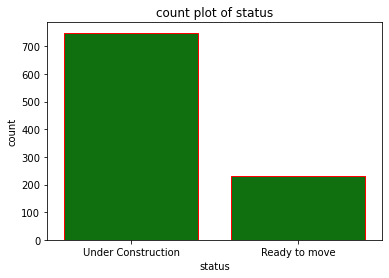

In [47]:
sns.countplot(df['status'],color='green',edgecolor='red')
plt.title('count plot of status') 
plt.show()

In [48]:
df.status.value_counts()

Under Construction    749
Ready to move         231
Name: status, dtype: int64

###### Observation : Most of houses are under construction

In [49]:
import warnings
warnings.filterwarnings('ignore')

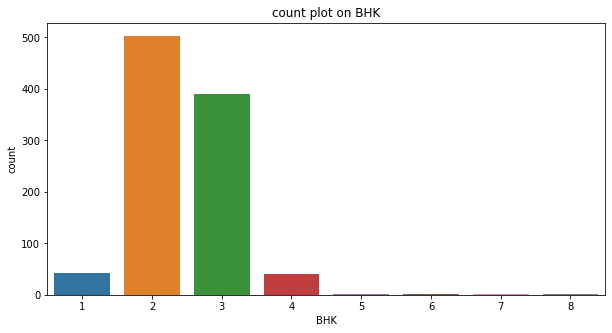

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(df['BHK'])
plt.title('count plot on BHK') 
plt.show()

##### 2 BHK houses are more available

Text(0.5, 1.0, 'count plot on property_type')

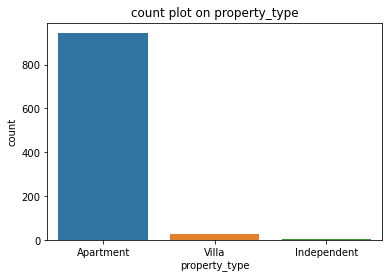

In [51]:
sns.countplot(df['property_type'])
plt.title('count plot on property_type')

#### Distrubution plot

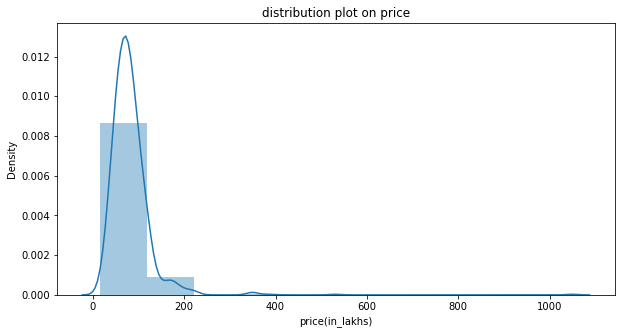

In [52]:
plt.figure(figsize=(10,5))
sns.distplot(df['price(in_lakhs)'],bins=10)
plt.title('distribution plot on price')
plt.show()

#### Boxplot

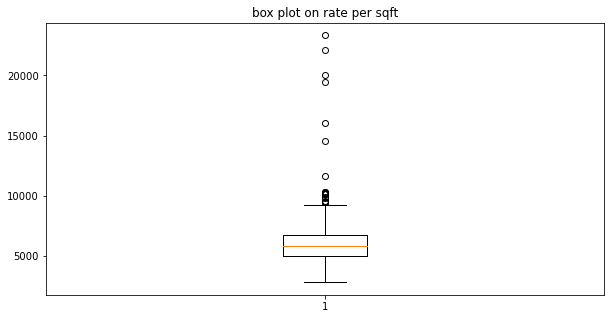

In [53]:
plt.figure(figsize=(10,5))
plt.boxplot(df['rate per sqft'])
plt.title('box plot on rate per sqft')
plt.show()

##### Observation : most of the values are spread between 0 and 12000

#### Histogram

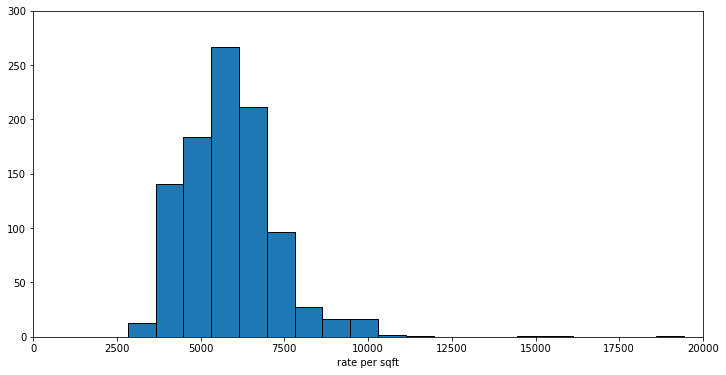

In [54]:
df_ratepersqft=df[df['rate per sqft']<20000]
plt.figure(figsize=(12,6))
plt.hist(df_ratepersqft['rate per sqft'],bins=20,edgecolor='black')
plt.xlim((0,20000))
plt.xlabel('rate per sqft')
plt.ylim((0,300))
plt.show()

##### Observation : most of the houses have 5500 to 7500 rs/sqft

#### Pie Chart

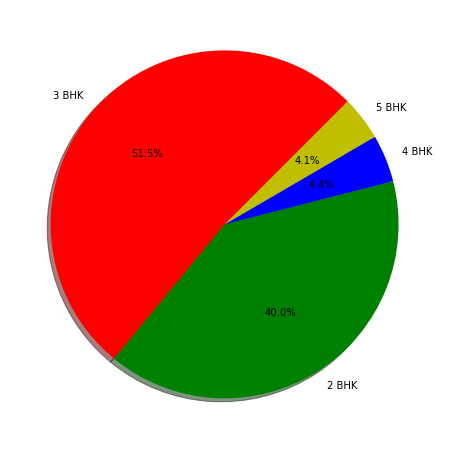

In [55]:
plt.figure(figsize=(15,8))
colors = ['r','g','b','y']
label=['3 BHK','2 BHK','4 BHK','5 BHK']
plt.pie(df['BHK'].value_counts().iloc[:4],labels=label,startangle=45,colors=colors,autopct='%1.1f%%',shadow=True)
plt.show()

##### Observation : above 45% houses are 3 BHK

#### Bivariate Analysis

In [56]:
pd.pivot_table(data=df,index=['property_type','BHK'],values=['price(in_lakhs)'])

price(in_lakhs)
property_type BHK                 
Apartment     1          41.037907
              2          65.783832
              3          93.483325
              4         202.726316
Independent   2         100.000000
              3         110.000000
              4         159.500000
              6         165.000000
              7         170.000000
              8         149.000000
Villa         2          39.500000
              3         175.983000
              4         175.947368
              5         189.000000

In [57]:
df.columns

Index(['property_type', 'seller', 'status', 'rate per sqft', 'area',
       'location', 'RERA', 'BHK', 'projectname', 'price(in_lakhs)'],
      dtype='object')

#### Bar plot

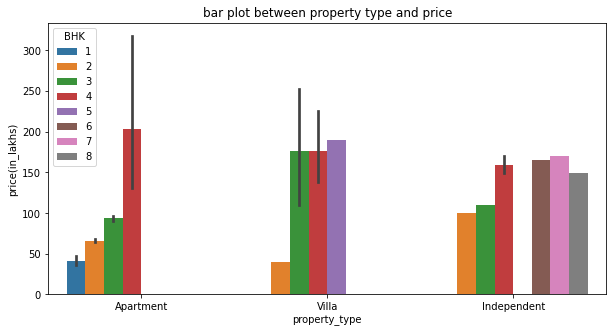

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x='property_type',y='price(in_lakhs)',hue="BHK",data=df)
plt.title('bar plot between property type and price')

plt.show()


##### Obseravtion : 

#### Line chart 

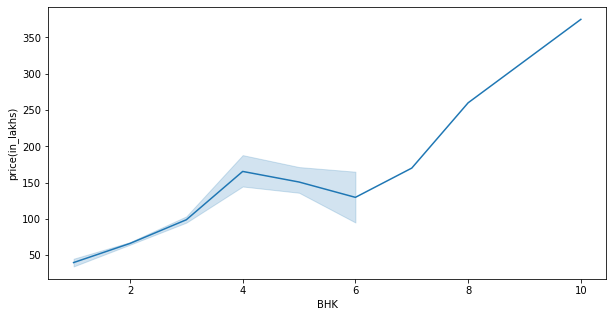

In [229]:
plt.figure(figsize=(10,5))
sns.lineplot(x='BHK',y='price(in_lakhs)',data=df)
plt.show()

#### Scatter plot

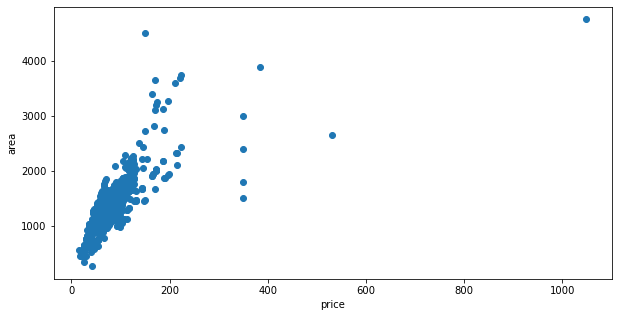

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(x='price(in_lakhs)',y='area',data=df)
plt.xlabel('price')
plt.ylabel('area')
plt.show()

##### Observation : price and area are highly positively correlated

#### Pair plot 

<Figure size 720x360 with 0 Axes>

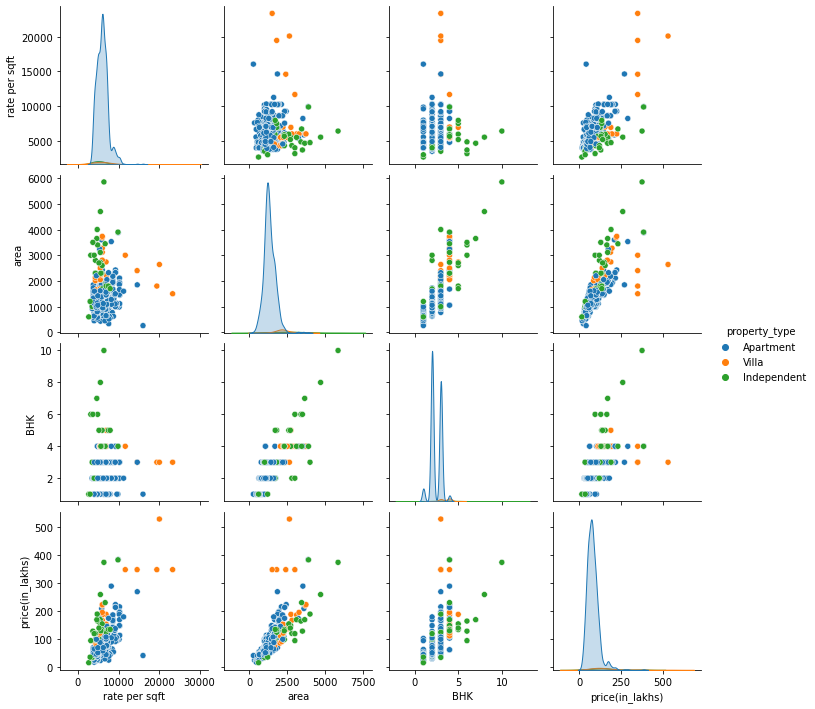

In [231]:
plt.figure(figsize=(10,5))
sns.pairplot(data=df,hue='property_type')
plt.show()

#### Comparing prices in some specific locations

In [232]:
loc=df['location'].value_counts()[0:10]
loc

Krishnarajapura                  165
Sarjapur                         111
Whitefield Hope Farm Junction     55
Thanisandra                       41
Horamavu                          40
Brookefield                       30
Vidyaranyapura                    29
Bellandur                         26
Kengeri                           25
Bannerghatta                      24
Name: location, dtype: int64

In [233]:
df_loc=df[(df['location'].isin(loc.index))]
df_loc.shape

(546, 10)

In [234]:
df_loc['location'].value_counts().to_frame()

,location
Krishnarajapura,165
Sarjapur,111
Whitefield Hope Farm Junction,55
Thanisandra,41
Horamavu,40
Brookefield,30
Vidyaranyapura,29
Bellandur,26
Kengeri,25
Bannerghatta,24


<Figure size 720x360 with 0 Axes>

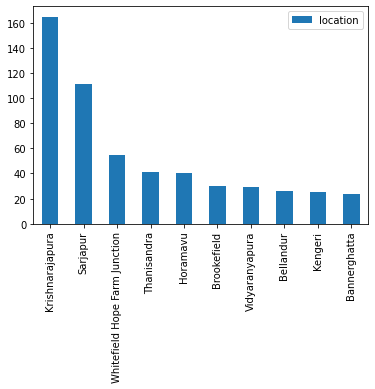

In [254]:
plt.figure(figsize=(10,5))
df_loc['location'].value_counts().to_frame().plot(kind='bar')
plt.show()


In [236]:
pd.pivot_table(data=df_loc,index=['location','BHK'],values=['rate per sqft'])

rate per sqft
location                      BHK               
Bannerghatta                  1      6866.666667
                              2      6980.555556
                              3     10287.272727
                              4     11666.000000
Bellandur                     2      6513.272727
                              3      5847.600000
Brookefield                   1      7224.250000
                              2      7026.384615
                              3      6566.222222
Horamavu                      2      4492.617647
                              3      4982.833333
Kengeri                       1      4801.333333
                              2      4779.227273
Krishnarajapura               2      5781.868687
                              3      6076.354839
                              4      5700.000000
Sarjapur                      1      4042.857143
                              2      4605.024390
                              3      4597.681818
                              4      5695.210526
Thanisandra                   2      7202.666667
                              3      7846.360000
                              4      8435.500000
Vidyaranyapura                2      4793.777778
                              3      4930.700000
Whitefield Hope Farm Junction 1     12007.500000
                              2      6067.655172
                              3      6051.181818
                              4      7032.500000

#### Rate per sqft with BHK based on locations :

Text(0.5, 1.0, 'Bar plot Representation of locations')

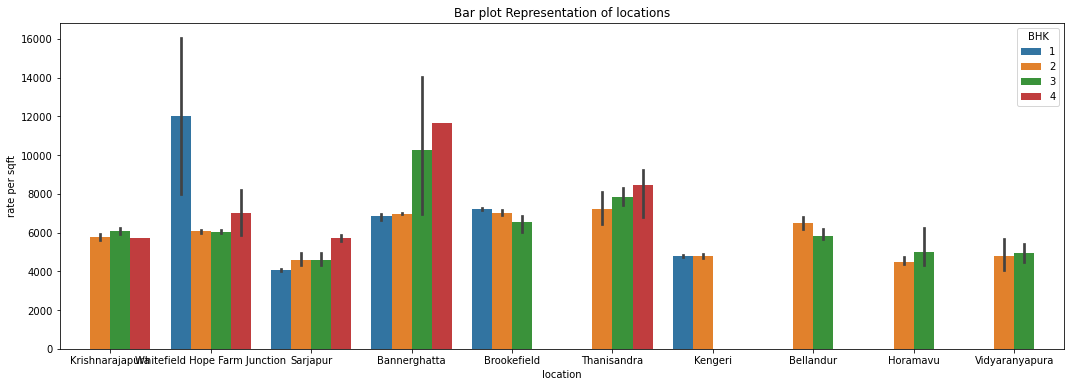

In [237]:
plt.figure(figsize=(18,6))
sns.barplot(x='location', y='rate per sqft',hue='BHK' ,data=df_loc)
plt.title('Bar plot Representation of locations')

##### Observation : houses in whitefield are more costly

#### Representation of locations

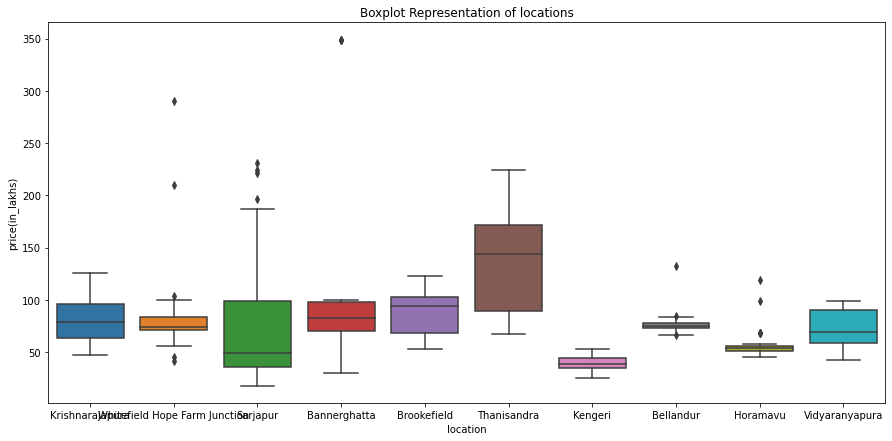

In [238]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_loc,x='location',y='price(in_lakhs)')
plt.title('Boxplot Representation of locations')
plt.show()

##### Obseravtion : we can observe max and min cost of houses at each location

In [239]:
pd.pivot_table(data=df_loc,index=['location','property_type'],values=['price(in_lakhs)'])

price(in_lakhs)
location                      property_type                 
Bannerghatta                  Apartment            75.454000
                              Villa               349.000000
Bellandur                     Apartment            77.301154
Brookefield                   Apartment            87.883333
Horamavu                      Apartment            57.090250
Kengeri                       Apartment            39.682800
Krishnarajapura               Apartment            81.207455
Sarjapur                      Apartment            47.110118
                              Independent         149.600000
                              Villa               136.450952
Thanisandra                   Apartment           135.691220
Vidyaranyapura                Apartment            71.255172
Whitefield Hope Farm Junction Apartment            82.611273

#### Heatmap

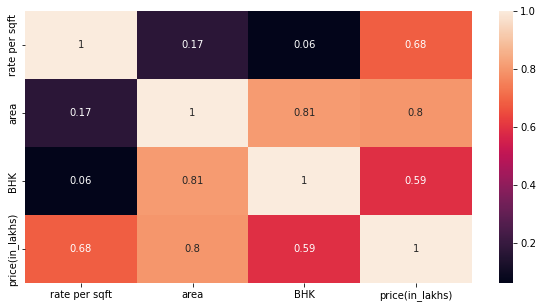

In [240]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [241]:
df.corr()

,rate per sqft,area,BHK,price(in_lakhs)
rate per sqft,1.000000,0.169931,0.060409,0.680985
area,0.169931,1.000000,0.807390,0.796501
BHK,0.060409,0.807390,1.000000,0.591118
price(in_lakhs),0.680985,0.796501,0.591118,1.000000


#### Comparing rate by seller

In [242]:
df_loc['seller'].value_counts().to_frame()

,seller
Modern Spaaces,57
Uniidus Projects,46
Puravankara Limited,33
Alpine Builders,33
Raja Housing,29
Casagrand Builder Private Limited,27
virendar kumar,25
Vaastu Structures,25
MC Builders,23
Nandi Housing,20


In [243]:
df.columns 

Index(['property_type', 'seller', 'status', 'rate per sqft', 'area',
       'location', 'RERA', 'BHK', 'projectname', 'price(in_lakhs)'],
      dtype='object')

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

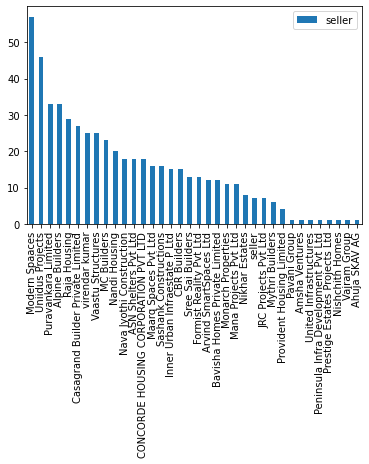

In [244]:
plt.figure(figsize=(10,5))
df_loc['seller'].value_counts().to_frame().plot(kind='bar')

<Figure size 1440x720 with 0 Axes>

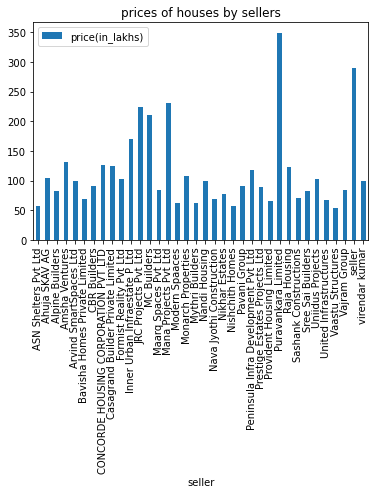

In [246]:
plt.figure(figsize=(20,10))
df_loc.groupby('seller')['price(in_lakhs)'].max().to_frame().plot(kind='bar')
plt.title('prices of houses by sellers')
plt.show()

##### Observation : The 'Mana projects pvt ltd ' is selling houses for more prices

In [247]:
df_loc.groupby('seller')['property_type'].unique().to_frame()

,property_type
seller,
ASN Shelters Pvt Ltd,[Apartment]
Ahuja SKAV AG,[Apartment]
Alpine Builders,[Apartment]
Amsha Ventures,[Apartment]
Arvind SmartSpaces Ltd,[Apartment]
Bavisha Homes Private Limited,[Apartment]
CBR Builders,[Apartment]
CONCORDE HOUSING CORPORATION PVT LTD,[Apartment]
Casagrand Builder Private Limited,[Apartment]


<Figure size 432x288 with 0 Axes>

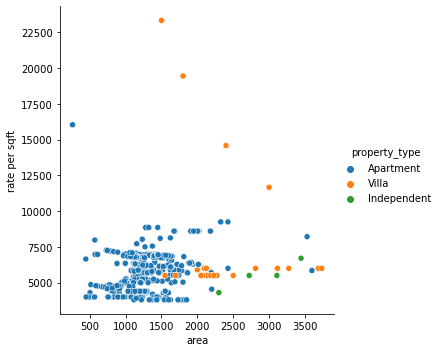

In [250]:
plt.figure(figsize=(6,4))
sns.relplot(x="area",y="rate per sqft",color='k',hue='property_type',data=df_loc)
plt.show()